In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import scipy


In [11]:
df = pd.read_csv('training_set_VU_DM.csv')

display(df.head())
df.info()

KeyboardInterrupt: 

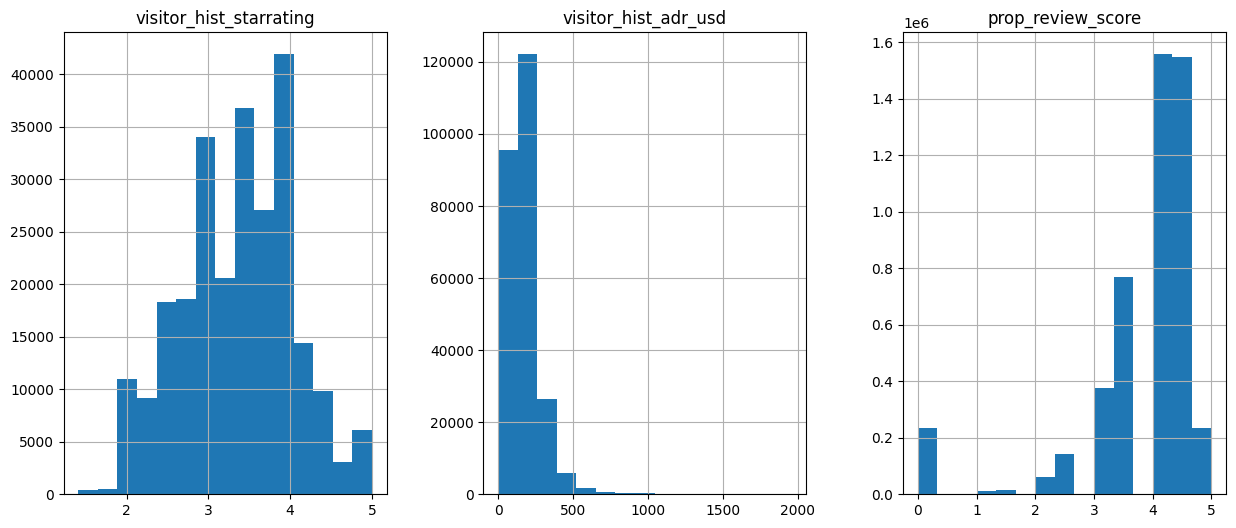

In [ ]:
# Histograms for numerical columns
df[['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score']].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()


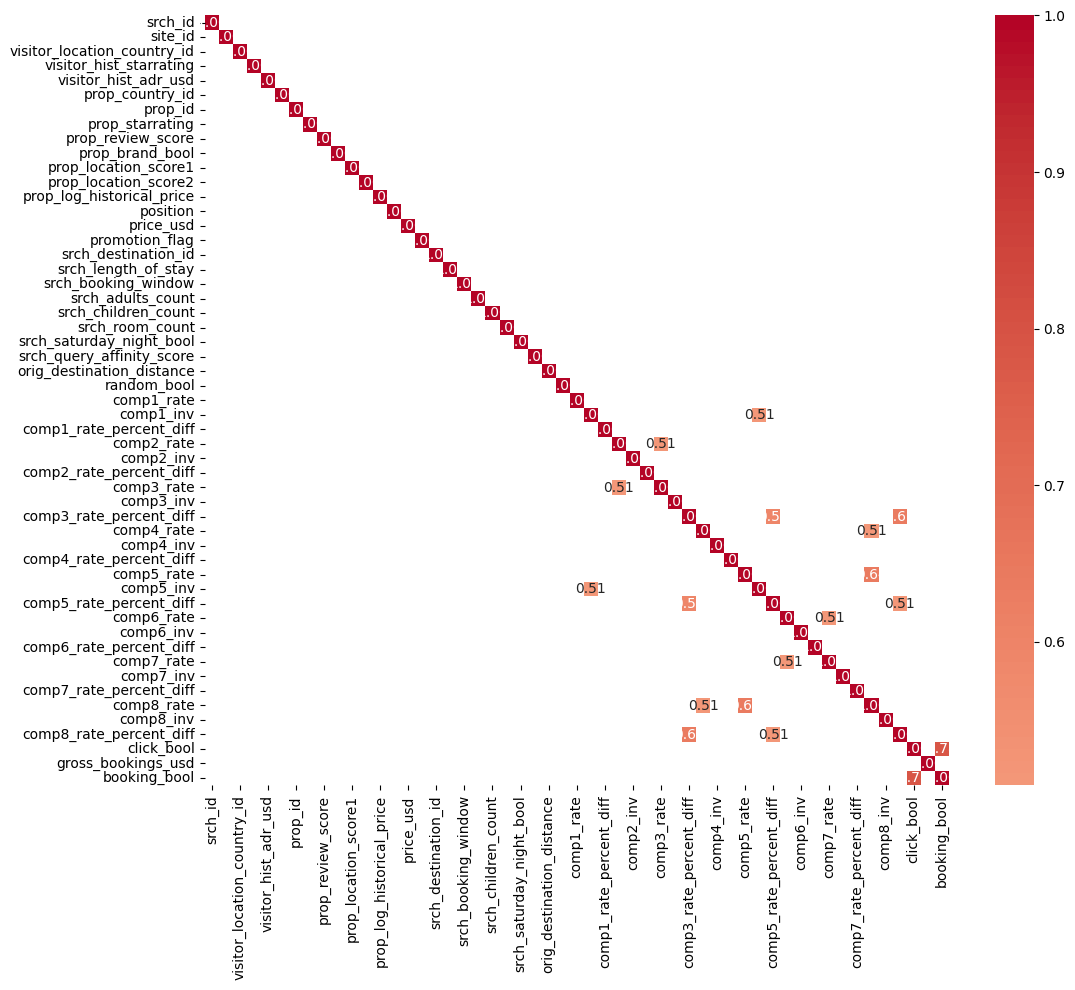

In [15]:

# Correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



In [16]:
threshold = 0.5  # You can adjust this value
# Mask to avoid redundancy and diagonal correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Filtering the DataFrame
high_corr = corr_matrix.where(mask)  # Apply mask to zero out lower triangle and diagonal
correlated_pairs = high_corr.stack()  # Stack to multi-index series

# Filtering by threshold
significant_pairs = correlated_pairs[abs(correlated_pairs) > threshold]
print("Highly Correlated Features:")
for (feature1, feature2), corr_value in significant_pairs.items():
    print(f"{feature1} and {feature2}: {corr_value:.2f}")


Highly Correlated Features:
click_bool and booking_bool: 0.78


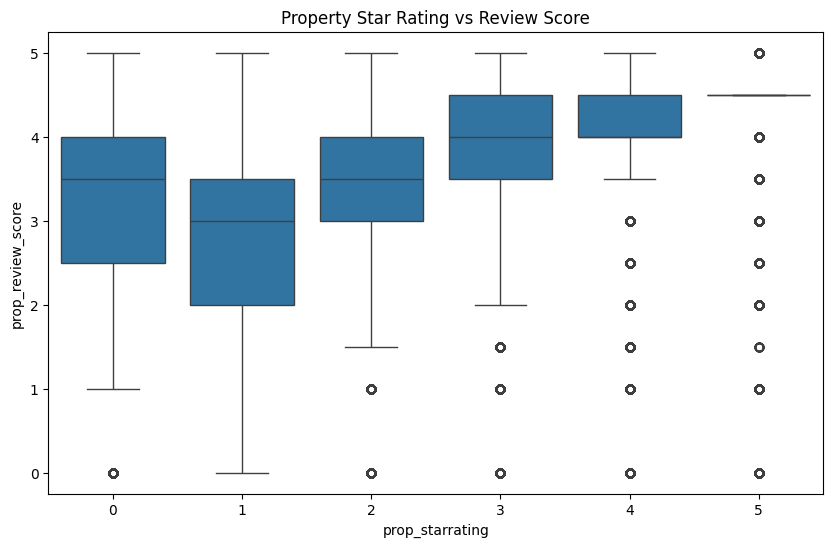

In [ ]:
# Boxplot for property star rating vs. review score
plt.figure(figsize=(10, 6))
sns.boxplot(x='prop_starrating', y='prop_review_score', data=df)
plt.title('Property Star Rating vs Review Score')
plt.show()


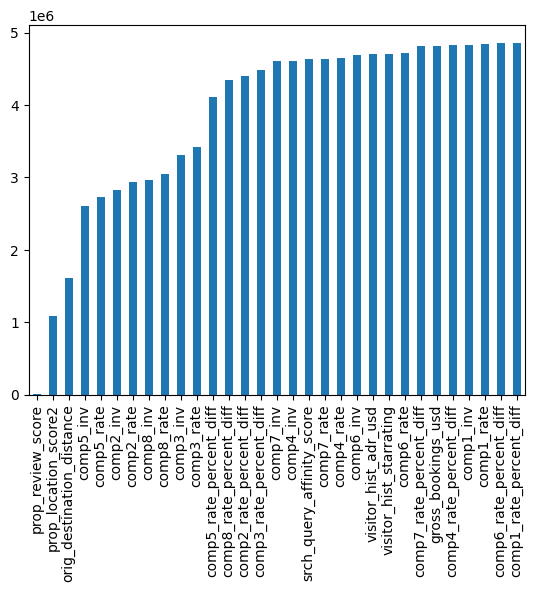

In [ ]:
# Plotting missing data
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()


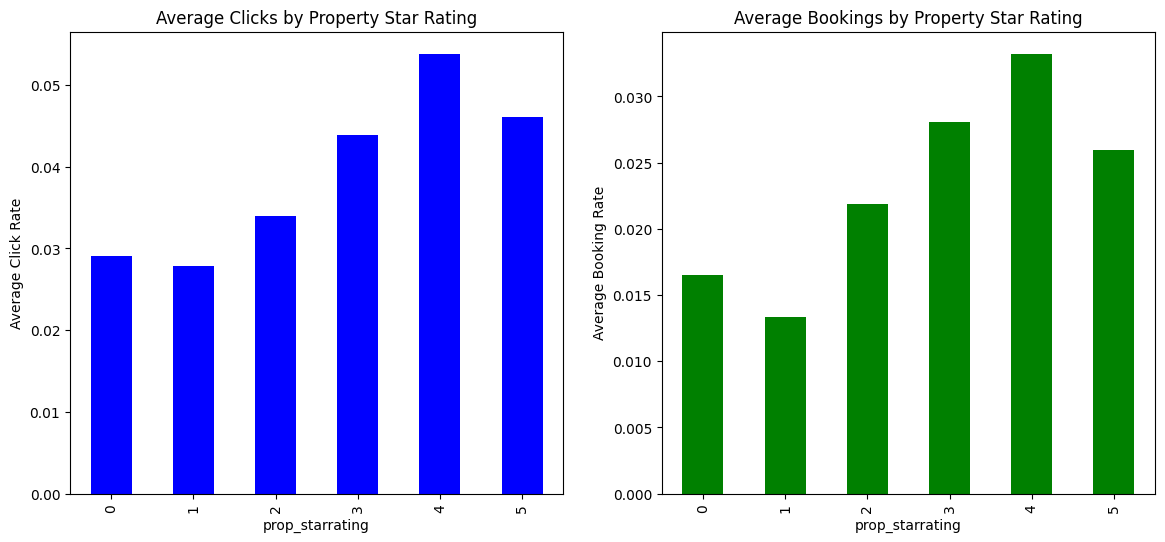

In [ ]:
# Clicks and bookings by star rating
clicks_by_rating = df.groupby('prop_starrating')['click_bool'].mean()
bookings_by_rating = df.groupby('prop_starrating')['booking_bool'].mean()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
clicks_by_rating.plot(kind='bar', color='blue')
plt.title('Average Clicks by Property Star Rating')
plt.ylabel('Average Click Rate')

plt.subplot(1, 2, 2)
bookings_by_rating.plot(kind='bar', color='green')
plt.title('Average Bookings by Property Star Rating')
plt.ylabel('Average Booking Rate')

plt.show()
